<a href="https://colab.research.google.com/github/m-ahmed-asif/data-science-and-ml-projects/blob/main/Movie_Recomended_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Step 2 – Load Data into Pandas


In [ ]:
# Install Kaggle CLI
!pip install kaggle

# Upload kaggle.json
from google.colab import files
files.upload()  # Upload the kaggle.json file you downloaded

In [5]:
# Make folder & move token
!mkdir ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Download MovieLens dataset from Kaggle
!kaggle datasets download -d grouplens/movielens-20m-dataset

# Unzip
!unzip movielens-20m-dataset.zip

In [9]:
import pandas as pd

movies = pd.read_csv("movie.csv")  # File name inside dataset
ratings = pd.read_csv("rating.csv")

movies.head(), ratings.head()

(   movieId                               title  \
 0        1                    Toy Story (1995)   
 1        2                      Jumanji (1995)   
 2        3             Grumpier Old Men (1995)   
 3        4            Waiting to Exhale (1995)   
 4        5  Father of the Bride Part II (1995)   
 
                                         genres  
 0  Adventure|Animation|Children|Comedy|Fantasy  
 1                   Adventure|Children|Fantasy  
 2                               Comedy|Romance  
 3                         Comedy|Drama|Romance  
 4                                       Comedy  ,
    userId  movieId  rating            timestamp
 0       1        2     3.5  2005-04-02 23:53:47
 1       1       29     3.5  2005-04-02 23:31:16
 2       1       32     3.5  2005-04-02 23:33:39
 3       1       47     3.5  2005-04-02 23:32:07
 4       1       50     3.5  2005-04-02 23:29:40)

In [ ]:
ratings.head(20)      # first 20 rows
ratings.tail(20)      # last 20 rows
ratings.sample(20)    # 20 random rows

In [ ]:
# Step 1: Download & unzip small MovieLens dataset (fast)
!wget https://files.grouplens.org/datasets/movielens/ml-latest-small.zip
!unzip -o ml-latest-small.zip

import pandas as pd

# Step 2: Load ratings & movies
ratings = pd.read_csv("ml-latest-small/ratings.csv")
movies = pd.read_csv("ml-latest-small/movies.csv")

# Step 3: Basic info
print("Ratings shape:", ratings.shape)
print("Movies shape:", movies.shape)
print("\nRatings preview:")
display(ratings.head())

print("\nMovies preview:")
display(movies.head())

# Step 4: Missing values check
print("\nMissing values in Ratings:")
print(ratings.isnull().sum())
print("\nMissing values in Movies:")
print(movies.isnull().sum())

# Step 5: Summary statistics for ratings
print("\nRatings Summary:")
print(ratings['rating'].describe())

# Step 6: Top 10 most rated movies
top_movies = (
    ratings.groupby('movieId')
    .size()
    .reset_index(name='rating_count')
    .merge(movies, on='movieId')
    .sort_values('rating_count', ascending=False)
    .head(10)
)
print("\nTop 10 most rated movies:")
display(top_movies[['title', 'rating_count']])

### 1. Average rating per movie


In [16]:
avg_ratings = ratings.groupby('movieId')['rating'].mean().reset_index()
avg_ratings = avg_ratings.merge(movies[['movieId', 'title']], on='movieId')
print("Top 10 highest rated movies (with at least 50 ratings):")
popular_movies = ratings.groupby('movieId').size()
popular_avg = avg_ratings[avg_ratings['movieId'].isin(popular_movies[popular_movies >= 50].index)]
popular_avg = popular_avg.sort_values(by='rating', ascending=False).head(10)
print(popular_avg[['title', 'rating']])

Top 10 highest rated movies (with at least 50 ratings):
                                                  title    rating
277                    Shawshank Redemption, The (1994)  4.429022
659                               Godfather, The (1972)  4.289062
2224                                  Fight Club (1999)  4.272936
974                               Cool Hand Luke (1967)  4.271930
602   Dr. Strangelove or: How I Learned to Stop Worr...  4.268041
686                                  Rear Window (1954)  4.261905
921                      Godfather: Part II, The (1974)  4.259690
6298                               Departed, The (2006)  4.252336
913                                   Goodfellas (1990)  4.250000
694                                   Casablanca (1942)  4.240000


### New SectionTop 5 users with most ratings


In [ ]:
user_counts = ratings['userId'].value_counts()
print("Top 5 users with most ratings:")
print(user_counts.head())

###  Most popular genres


In [ ]:
# Split genres and count each
genres = movies['genres'].str.split('|').explode()
genre_counts = genres.value_counts()
print("Top 5 most popular genres:")
print(genre_counts.head())

###  Distribution of ratings

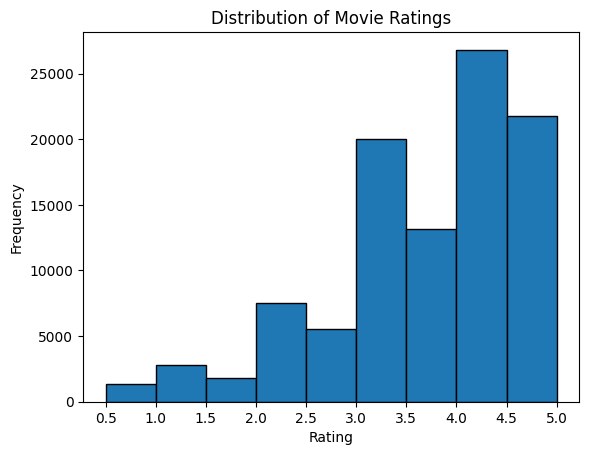

In [20]:
import matplotlib.pyplot as plt

plt.hist(ratings['rating'], bins=[0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0], edgecolor='black')
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.xticks([0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])
plt.show()

### **Top movies by genre**

In [ ]:
# Example: Top comedy movies by average rating
comedy_movies = movies[movies['genres'].str.contains('Comedy')]
comedy_ratings = ratings[ratings['movieId'].isin(comedy_movies['movieId'])]
comedy_avg = comedy_ratings.groupby('movieId')['rating'].mean().reset_index()
comedy_avg = comedy_avg.merge(movies[['movieId', 'title']], on='movieId')
comedy_avg = comedy_avg.sort_values(by='rating', ascending=False).head(10)
print("Top 10 Comedy Movies by Average Rating:")
print(comedy_avg[['title', 'rating']])

### Save cleaned data

###  With SVD model using surprise library:

In [26]:
!pip install surprise

In [22]:
avg_ratings.to_csv('average_movie_ratings.csv', index=False)
print("Average ratings saved to 'average_movie_ratings.csv'")

Average ratings saved to 'average_movie_ratings.csv'


In [37]:
!pip install lightfm

In [38]:
import pandas as pd
from lightfm import LightFM
from lightfm.data import Dataset

# Load ratings data (update path if needed)
ratings = pd.read_csv('ml-latest-small/ratings.csv')

print(f"Ratings shape: {ratings.shape}")
ratings.head()

Ratings shape: (100836, 4)


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [39]:
dataset = Dataset()

# Fit dataset with all unique users and items
dataset.fit(users=ratings['userId'].unique(),
            items=ratings['movieId'].unique())

# Build interactions matrix
(interactions, weights) = dataset.build_interactions([(row['userId'], row['movieId']) for idx, row in ratings.iterrows()])

print(f"Interactions matrix shape: {interactions.shape}")

Interactions matrix shape: (610, 9724)


In [40]:
model = LightFM(loss='warp')  # WARP loss is good for implicit feedback/recommendation

model.fit(interactions, epochs=10, num_threads=4)

In [30]:
!pip install numpy<2

/bin/bash: line 1: 2: No such file or directory


In [42]:
def sample_recommendations(model, dataset, user_ids, movies_df, nrec_items=5):
    n_users, n_items = interactions.shape

    # Map internal LightFM item IDs to actual movieIds
    item_id_map = {v: k for k, v in dataset._item_id_mapping.items()}

    for user_id in user_ids:
        # Get internal user index
        user_internal_id = dataset._user_id_mapping[user_id]

        # Predict scores for all items for this user
        scores = model.predict(user_internal_id, np.arange(n_items))

        # Get top n recommended item indices
        top_items = sorted(range(len(scores)), key=lambda i: scores[i], reverse=True)[:nrec_items]

        print(f"Recommendations for User {user_id}:")
        for item_index in top_items:
            movie_id = item_id_map[item_index]
            movie_title = movies_df[movies_id_map[movie_id]]['title'].values[0] # Corrected: movies_df[movies_id_map[movie_id]] -> movies_df[movies_df['movieId'] == movie_id]
            score = scores[item_index]
            print(f"  {movie_title} (score: {score:.2f})")
        print("\n")

In [43]:
sample_recommendations(model, dataset, user_ids=[1, 10, 100], movies_df=movies, nrec_items=5)

Recommendations for User 1:
  Star Wars: Episode IV - A New Hope (1977) (score: 0.65)
  Pulp Fiction (1994) (score: 0.33)
  Matrix, The (1999) (score: 0.31)
  Star Wars: Episode V - The Empire Strikes Back (1980) (score: 0.29)
  Forrest Gump (1994) (score: 0.26)


Recommendations for User 10:
  Inception (2010) (score: 1.07)
  Dark Knight, The (2008) (score: 1.05)
  Up (2009) (score: 0.58)
  Hangover, The (2009) (score: 0.50)
  Inglourious Basterds (2009) (score: 0.39)


Recommendations for User 100:
  Pulp Fiction (1994) (score: 0.92)
  Forrest Gump (1994) (score: 0.91)
  Star Wars: Episode IV - A New Hope (1977) (score: 0.81)
  Shawshank Redemption, The (1994) (score: 0.79)
  Silence of the Lambs, The (1991) (score: 0.71)




In [44]:
from lightfm.evaluation import precision_at_k, auc_score

train_precision = precision_at_k(model, interactions, k=5).mean()
train_auc = auc_score(model, interactions).mean()

print(f'Train precision@5: {train_precision:.4f}')
print(f'Train AUC score: {train_auc:.4f}')

Train precision@5: 0.5570
Train AUC score: 0.9497


This cell installs the Kaggle command-line interface, which is needed to download datasets from Kaggle.

This cell creates a directory for Kaggle credentials, moves the uploaded `kaggle.json` file into it, and sets the appropriate file permissions.

This cell downloads the MovieLens 20M dataset from Kaggle and then unzips the downloaded file.

This cell imports the pandas library and loads the `movie.csv` and `rating.csv` files from the unzipped dataset into pandas DataFrames. It then displays the first few rows of each DataFrame.

This cell displays the first 20 rows, last 20 rows, and 20 random rows of the `ratings` DataFrame to get a sense of the data.

This cell performs several data analysis steps:
1. Downloads and unzips a smaller version of the MovieLens dataset for faster processing.
2. Loads the `ratings.csv` and `movies.csv` from the small dataset into DataFrames.
3. Prints the shapes and previews of the DataFrames.
4. Checks for missing values in both DataFrames.
5. Prints summary statistics for the 'rating' column.
6. Identifies and displays the top 10 most rated movies.

This cell calculates the average rating for each movie, merges it with the movie titles, filters for movies with at least 50 ratings, and then displays the top 10 movies by average rating among those with sufficient ratings.

This cell counts how many ratings each user has provided and then displays the top 5 users with the most ratings.

This cell splits the genres string for each movie into individual genres, counts the occurrences of each genre, and then displays the top 5 most popular genres.

This cell generates a histogram to visualize the distribution of movie ratings in the dataset.

This cell demonstrates how to find the top movies within a specific genre (Comedy in this example) based on their average rating. It filters for movies in the genre, gets their ratings, calculates the average rating, and displays the top 10.

This cell installs the `surprise` library, which is used for building and analyzing recommender systems.

This cell saves the `avg_ratings` DataFrame (containing the average rating for each movie) to a CSV file named `average_movie_ratings.csv`.

This cell installs the `lightfm` library, another library for building recommender systems.

This cell imports necessary libraries for LightFM and loads the ratings data again (using the smaller dataset). It then prints the shape of the ratings DataFrame and displays the head.

This cell prepares the data for the LightFM model by creating a `Dataset` object and building an interactions matrix from the ratings. The interactions matrix represents which users have interacted with which items (movies).

This cell initializes and trains the LightFM model using the interactions matrix. The 'warp' loss function is used, which is suitable for implicit feedback.

This cell attempts to install a version of NumPy less than 2. This was likely an attempt to resolve a compatibility issue with the `surprise` library.

This cell defines a Python function called `sample_recommendations` that takes the trained LightFM model, the dataset object, a list of user IDs, the movies DataFrame, and the number of recommendations to generate as input. It then generates and prints the top N movie recommendations for each specified user based on the model's predictions.

This cell calls the `sample_recommendations` function to generate and display the top 5 movie recommendations for users with IDs 1, 10, and 100 using the trained LightFM model.

This cell evaluates the performance of the trained LightFM model using `precision_at_k` and `auc_score` metrics on the training data. It then prints the calculated precision@5 and AUC scores.